### Code for creating timeseries plots of relevant wave breaking events. 

Specifically, looking at those Messori 2022 cold or warm events.

In [1]:
#relevant import statements
import numpy as np
import math
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
infile = open("./diagnostics/wind_1959.p", 'rb') 
wind = pickle.load(infile)
infile.close()

infile = open("./diagnostics/size_1959.p", 'rb') 
size = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ratio_1959.p", 'rb') 
rat = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ephi_1959.p", 'rb') 
ephi = pickle.load(infile)
infile.close()

infile = open("./diagnostics/cenlat_1959.p", 'rb')
cenlat = pickle.load(infile)
infile.close()

infile = open("./diagnostics/cenlon_1959.p", 'rb') 
cenlon = pickle.load(infile)
infile.close()

infile = open("./diagnostics/number_1959.p", 'rb') 
number = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ANOM_weighted_capgph_1959.p", 'rb') 
gph1000 = pickle.load(infile)
infile.close()

In [3]:
wind.shape

(64, 2, 151)

In [4]:
#remove leap year
wind = np.delete(wind,[20],0)
rat = np.delete(rat,[20],0)
cenlat = np.delete(cenlat,[20],0)
cenlon = np.delete(cenlon,[20],0)
size = np.delete(size,[20],0)
ephi = np.delete(ephi,[20],0)
number = np.delete(number,[20],0)

wind = np.nanmean(wind,axis=1)
rat = np.nanmean(rat,axis=1)
cenlat = np.nanmean(cenlat,axis=1)
cenlon = np.nanmean(cenlon,axis=1)
size = np.nanmean(size,axis=1)
ephi = np.nanmean(ephi,axis=1)

/tmp/ipykernel_2511135/614719783.py:10: RuntimeWarning: Mean of empty slice
  wind = np.nanmean(wind,axis=1)
/tmp/ipykernel_2511135/614719783.py:11: RuntimeWarning: Mean of empty slice
  rat = np.nanmean(rat,axis=1)
/tmp/ipykernel_2511135/614719783.py:12: RuntimeWarning: Mean of empty slice
  cenlat = np.nanmean(cenlat,axis=1)
/tmp/ipykernel_2511135/614719783.py:13: RuntimeWarning: Mean of empty slice
  cenlon = np.nanmean(cenlon,axis=1)
/tmp/ipykernel_2511135/614719783.py:14: RuntimeWarning: Mean of empty slice
  size = np.nanmean(size,axis=1)
/tmp/ipykernel_2511135/614719783.py:15: RuntimeWarning: Mean of empty slice
  ephi = np.nanmean(ephi,axis=1)


In [5]:
gph1000.shape

(63, 152)

In [6]:
wind.shape

(63, 151)

In [7]:
number.shape

(63, 151)

In [8]:
#remove leap day
gph1000 = np.delete(gph1000,[120],1)

In [9]:
all_year = [20,21,22,23,24,24,24,25,26,27,29,30,31,32,32,33,34,34,35,36,38,40,
           41,42,43,43,44,45,45,46,47,48,48,50,52,52,53,54,54,55,56,58,60,61]
len(all_year)

44

In [10]:
all_index = [104,77,50,69,40,68,91,40,88,70,84,70,76,62,95,97,41,126,64,80,55,
            119,76,71,95,116,56,56,106,64,82,34,69,79,43,93,53,76,111,106,62,73,
            89,43]
len(all_index)

44

In [11]:
warm_year = [21,23,24,26,30,35,45,46,48,52,58,61]
print(len(warm_year))
warm_index = [77,79,91,88,70,64,56,64,34,43,73,43]

cold_year = [22,24,24,25,27,29,31,32,32,33,34,34,36,38,40,42,43,43,44,45,47,
            48,50,52,54,54,56,60]
print(len(cold_year))
cold_index = [50,40,68,40,70,84,76,62,95,97,41,126,80,55,119,71,95,116,56,106,
             82,69,79,93,76,111,62,89]

12
28


In [12]:
neut_year = [20,41,53,55]
neut_index = [104,76,53,106]

In [13]:
## Averaging for ALL
ssw_wind = np.empty((44,30))
ssw_wind[:] = np.nan

ssw_rat = np.empty((44,30))
ssw_rat[:] = np.nan

ssw_size = np.empty((44,30))
ssw_size[:] = np.nan

ssw_cenlt = np.empty((44,30))
ssw_cenlt[:] = np.nan

ssw_cenln = np.empty((44,30))
ssw_cenln[:] = np.nan

ssw_ep= np.empty((44,30))
ssw_ep[:] = np.nan

ssw_num= np.empty((44,30))
ssw_num[:] = np.nan

ssw_g= np.empty((44,30))
ssw_g[:] = np.nan

for i in range(len(all_index)):
    print(i)
    d1 = int(all_index[i]-10)
    #print(d1)
    d2 = int(all_index[i]+20)
    #print(d2)
    
    ##diagnostics
    
    w = wind[all_year[i],d1:d2] #wind
    ssw_wind[i] = w[:]
    
    r = rat[all_year[i],d1:d2]
    ssw_rat[i] = r[:]
    
    clt = cenlat[all_year[i],d1:d2]
    ssw_cenlt[i] = clt[:]

    cln = cenlon[all_year[i],d1:d2]
    ssw_cenln[i] = cln[:]
    
    sz = size[all_year[i],d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi[all_year[i],d1:d2]
    ssw_ep[i] = ep[:]

    num = number[all_year[i],d1:d2]
    ssw_num[i] = num[:]

    g = gph1000[all_year[i],d1:d2]
    ssw_g[i] = g[:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [14]:
sswrat = np.nanmean(ssw_rat[:,:],axis=0)
sswwind =  np.nanmean(ssw_wind[:,:],axis=0)
sswcenlt =  np.nanmean(ssw_cenlt[:,:],axis=0)
sswcenln =  np.nanmean(ssw_cenln[:,:],axis=0)
sswsize =  np.nanmean(ssw_size[:,:],axis=0)
sswep =  np.nanmean(ssw_ep[:,:],axis=0)
sswnum =  np.nanmean(ssw_num[:,:],axis=0)
sswg =  np.nanmean(ssw_g[:,:],axis=0)

#sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
#sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
#sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
#sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
#sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
#sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

In [15]:
## Averaging for COLD
ssw_wind1 = np.empty((len(cold_year),30))
ssw_wind1[:] = np.nan

ssw_rat1 = np.empty((len(cold_year),30))
ssw_rat1[:] = np.nan

ssw_size1 = np.empty((len(cold_year),30))
ssw_size1[:] = np.nan

ssw_cenlt1 = np.empty((len(cold_year),30))
ssw_cenlt1[:] = np.nan

ssw_cenln1 = np.empty((len(cold_year),30))
ssw_cenln1[:] = np.nan

ssw_ep1= np.empty((len(cold_year),30))
ssw_ep1[:] = np.nan

ssw_num1= np.empty((len(cold_year),30))
ssw_num1[:] = np.nan

ssw_g1= np.empty((len(cold_year),30))
ssw_g1[:] = np.nan

for i in range(len(cold_index)):
    print(i)
    d1 = int(cold_index[i]-10)
    #print(d1)
    d2 = int(cold_index[i]+20)
    #print(d2)
    
    ##diagnostics
    
    w = wind[cold_year[i],d1:d2] #wind
    ssw_wind1[i] = w[:]
    
    r = rat[cold_year[i],d1:d2]
    ssw_rat1[i] = r[:]
    
    clt = cenlat[cold_year[i],d1:d2]
    ssw_cenlt1[i] = clt[:]

    cln = cenlon[cold_year[i],d1:d2]
    ssw_cenln1[i] = cln[:]
    
    sz = size[cold_year[i],d1:d2]
    ssw_size1[i] = sz[:]
    
    ep = ephi[cold_year[i],d1:d2]
    ssw_ep1[i] = ep[:]

    num = number[cold_year[i],d1:d2]
    ssw_num1[i] = num[:]

    g = gph1000[cold_year[i],d1:d2]
    ssw_g1[i] = g[:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [16]:
sswrat1 = np.nanmean(ssw_rat1[:,:],axis=0)
sswwind1 =  np.nanmean(ssw_wind1[:,:],axis=0)
sswcenlt1 =  np.nanmean(ssw_cenlt1[:,:],axis=0)
sswcenln1 =  np.nanmean(ssw_cenln1[:,:],axis=0)
sswsize1 =  np.nanmean(ssw_size1[:,:],axis=0)
sswep1 =  np.nanmean(ssw_ep1[:,:],axis=0)
sswnum1 =  np.nanmean(ssw_num1[:,:],axis=0)
sswg1 =  np.nanmean(ssw_g1[:,:],axis=0)

#sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
#sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
#sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
#sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
#sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
#sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

In [17]:
## Averaging for WARM
ssw_wind3 = np.empty((len(warm_year),30))
ssw_wind3[:] = np.nan

ssw_rat3 = np.empty((len(warm_year),30))
ssw_rat3[:] = np.nan

ssw_size3 = np.empty((len(warm_year),30))
ssw_size3[:] = np.nan

ssw_cenlt3 = np.empty((len(warm_year),30))
ssw_cenlt3[:] = np.nan

ssw_cenln3 = np.empty((len(warm_year),30))
ssw_cenln3[:] = np.nan

ssw_ep3= np.empty((len(warm_year),30))
ssw_ep3[:] = np.nan

ssw_num3= np.empty((len(warm_year),30))
ssw_num3[:] = np.nan

ssw_g3= np.empty((len(warm_year),30))
ssw_g3[:] = np.nan

for i in range(len(warm_index)):
    print(i)
    d1 = int(warm_index[i]-10)
    #print(d1)
    d2 = int(warm_index[i]+20)
    #print(d2)
    
    ##diagnostics
    
    w = wind[warm_year[i],d1:d2] #wind
    ssw_wind3[i] = w[:]
    
    r = rat[warm_year[i],d1:d2]
    ssw_rat3[i] = r[:]
    
    clt = cenlat[warm_year[i],d1:d2]
    ssw_cenlt3[i] = clt[:]

    cln = cenlon[warm_year[i],d1:d2]
    ssw_cenln3[i] = cln[:]
    
    sz = size[warm_year[i],d1:d2]
    ssw_size3[i] = sz[:]
    
    ep = ephi[warm_year[i],d1:d2]
    ssw_ep3[i] = ep[:]

    num = number[warm_year[i],d1:d2]
    ssw_num3[i] = num[:]

    g = gph1000[warm_year[i],d1:d2]
    ssw_g3[i] = g[:]

0
1
2
3
4
5
6
7
8
9
10
11


In [18]:
sswrat3 = np.nanmean(ssw_rat3[:,:],axis=0)
sswwind3 =  np.nanmean(ssw_wind3[:,:],axis=0)
sswcenlt3 =  np.nanmean(ssw_cenlt3[:,:],axis=0)
sswcenln3 =  np.nanmean(ssw_cenln3[:,:],axis=0)
sswsize3 =  np.nanmean(ssw_size3[:,:],axis=0)
sswep3 =  np.nanmean(ssw_ep3[:,:],axis=0)
sswnum3 =  np.nanmean(ssw_num3[:,:],axis=0)
sswg3 =  np.nanmean(ssw_g3[:,:],axis=0)

#sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
#sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
#sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
#sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
#sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
#sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

In [19]:
## Averaging for Neutral
ssw_wind2 = np.empty((len(neut_year),30))
ssw_wind2[:] = np.nan

ssw_rat2 = np.empty((len(neut_year),30))
ssw_rat2[:] = np.nan

ssw_size2 = np.empty((len(neut_year),30))
ssw_size2[:] = np.nan

ssw_cenlt2 = np.empty((len(neut_year),30))
ssw_cenlt2[:] = np.nan

ssw_cenln2 = np.empty((len(neut_year),30))
ssw_cenln2[:] = np.nan

ssw_ep2= np.empty((len(neut_year),30))
ssw_ep2[:] = np.nan

ssw_num2= np.empty((len(neut_year),30))
ssw_num2[:] = np.nan

ssw_g2= np.empty((len(neut_year),30))
ssw_g2[:] = np.nan

for i in range(len(neut_index)):
    print(i)
    d1 = int(neut_index[i]-10)
    #print(d1)
    d2 = int(neut_index[i]+20)
    #print(d2)
    
    ##diagnostics
    
    w = wind[neut_year[i],d1:d2] #wind
    ssw_wind2[i] = w[:]
    
    r = rat[neut_year[i],d1:d2]
    ssw_rat2[i] = r[:]
    
    clt = cenlat[neut_year[i],d1:d2]
    ssw_cenlt2[i] = clt[:]

    cln = cenlon[neut_year[i],d1:d2]
    ssw_cenln2[i] = cln[:]
    
    sz = size[neut_year[i],d1:d2]
    ssw_size2[i] = sz[:]
    
    ep = ephi[neut_year[i],d1:d2]
    ssw_ep2[i] = ep[:]

    num = number[neut_year[i],d1:d2]
    ssw_num2[i] = num[:]

    g = gph1000[neut_year[i],d1:d2]
    ssw_g2[i] = g[:]

0
1
2
3


In [20]:
sswrat2 = np.nanmean(ssw_rat2[:,:],axis=0)
sswwind2 =  np.nanmean(ssw_wind2[:,:],axis=0)
sswcenlt2 =  np.nanmean(ssw_cenlt2[:,:],axis=0)
sswcenln2 =  np.nanmean(ssw_cenln2[:,:],axis=0)
sswsize2 =  np.nanmean(ssw_size2[:,:],axis=0)
sswep2 =  np.nanmean(ssw_ep2[:,:],axis=0)
sswnum2 =  np.nanmean(ssw_num2[:,:],axis=0)
sswg2 =  np.nanmean(ssw_g2[:,:],axis=0)

#sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
#sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
#sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
#sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
#sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
#sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

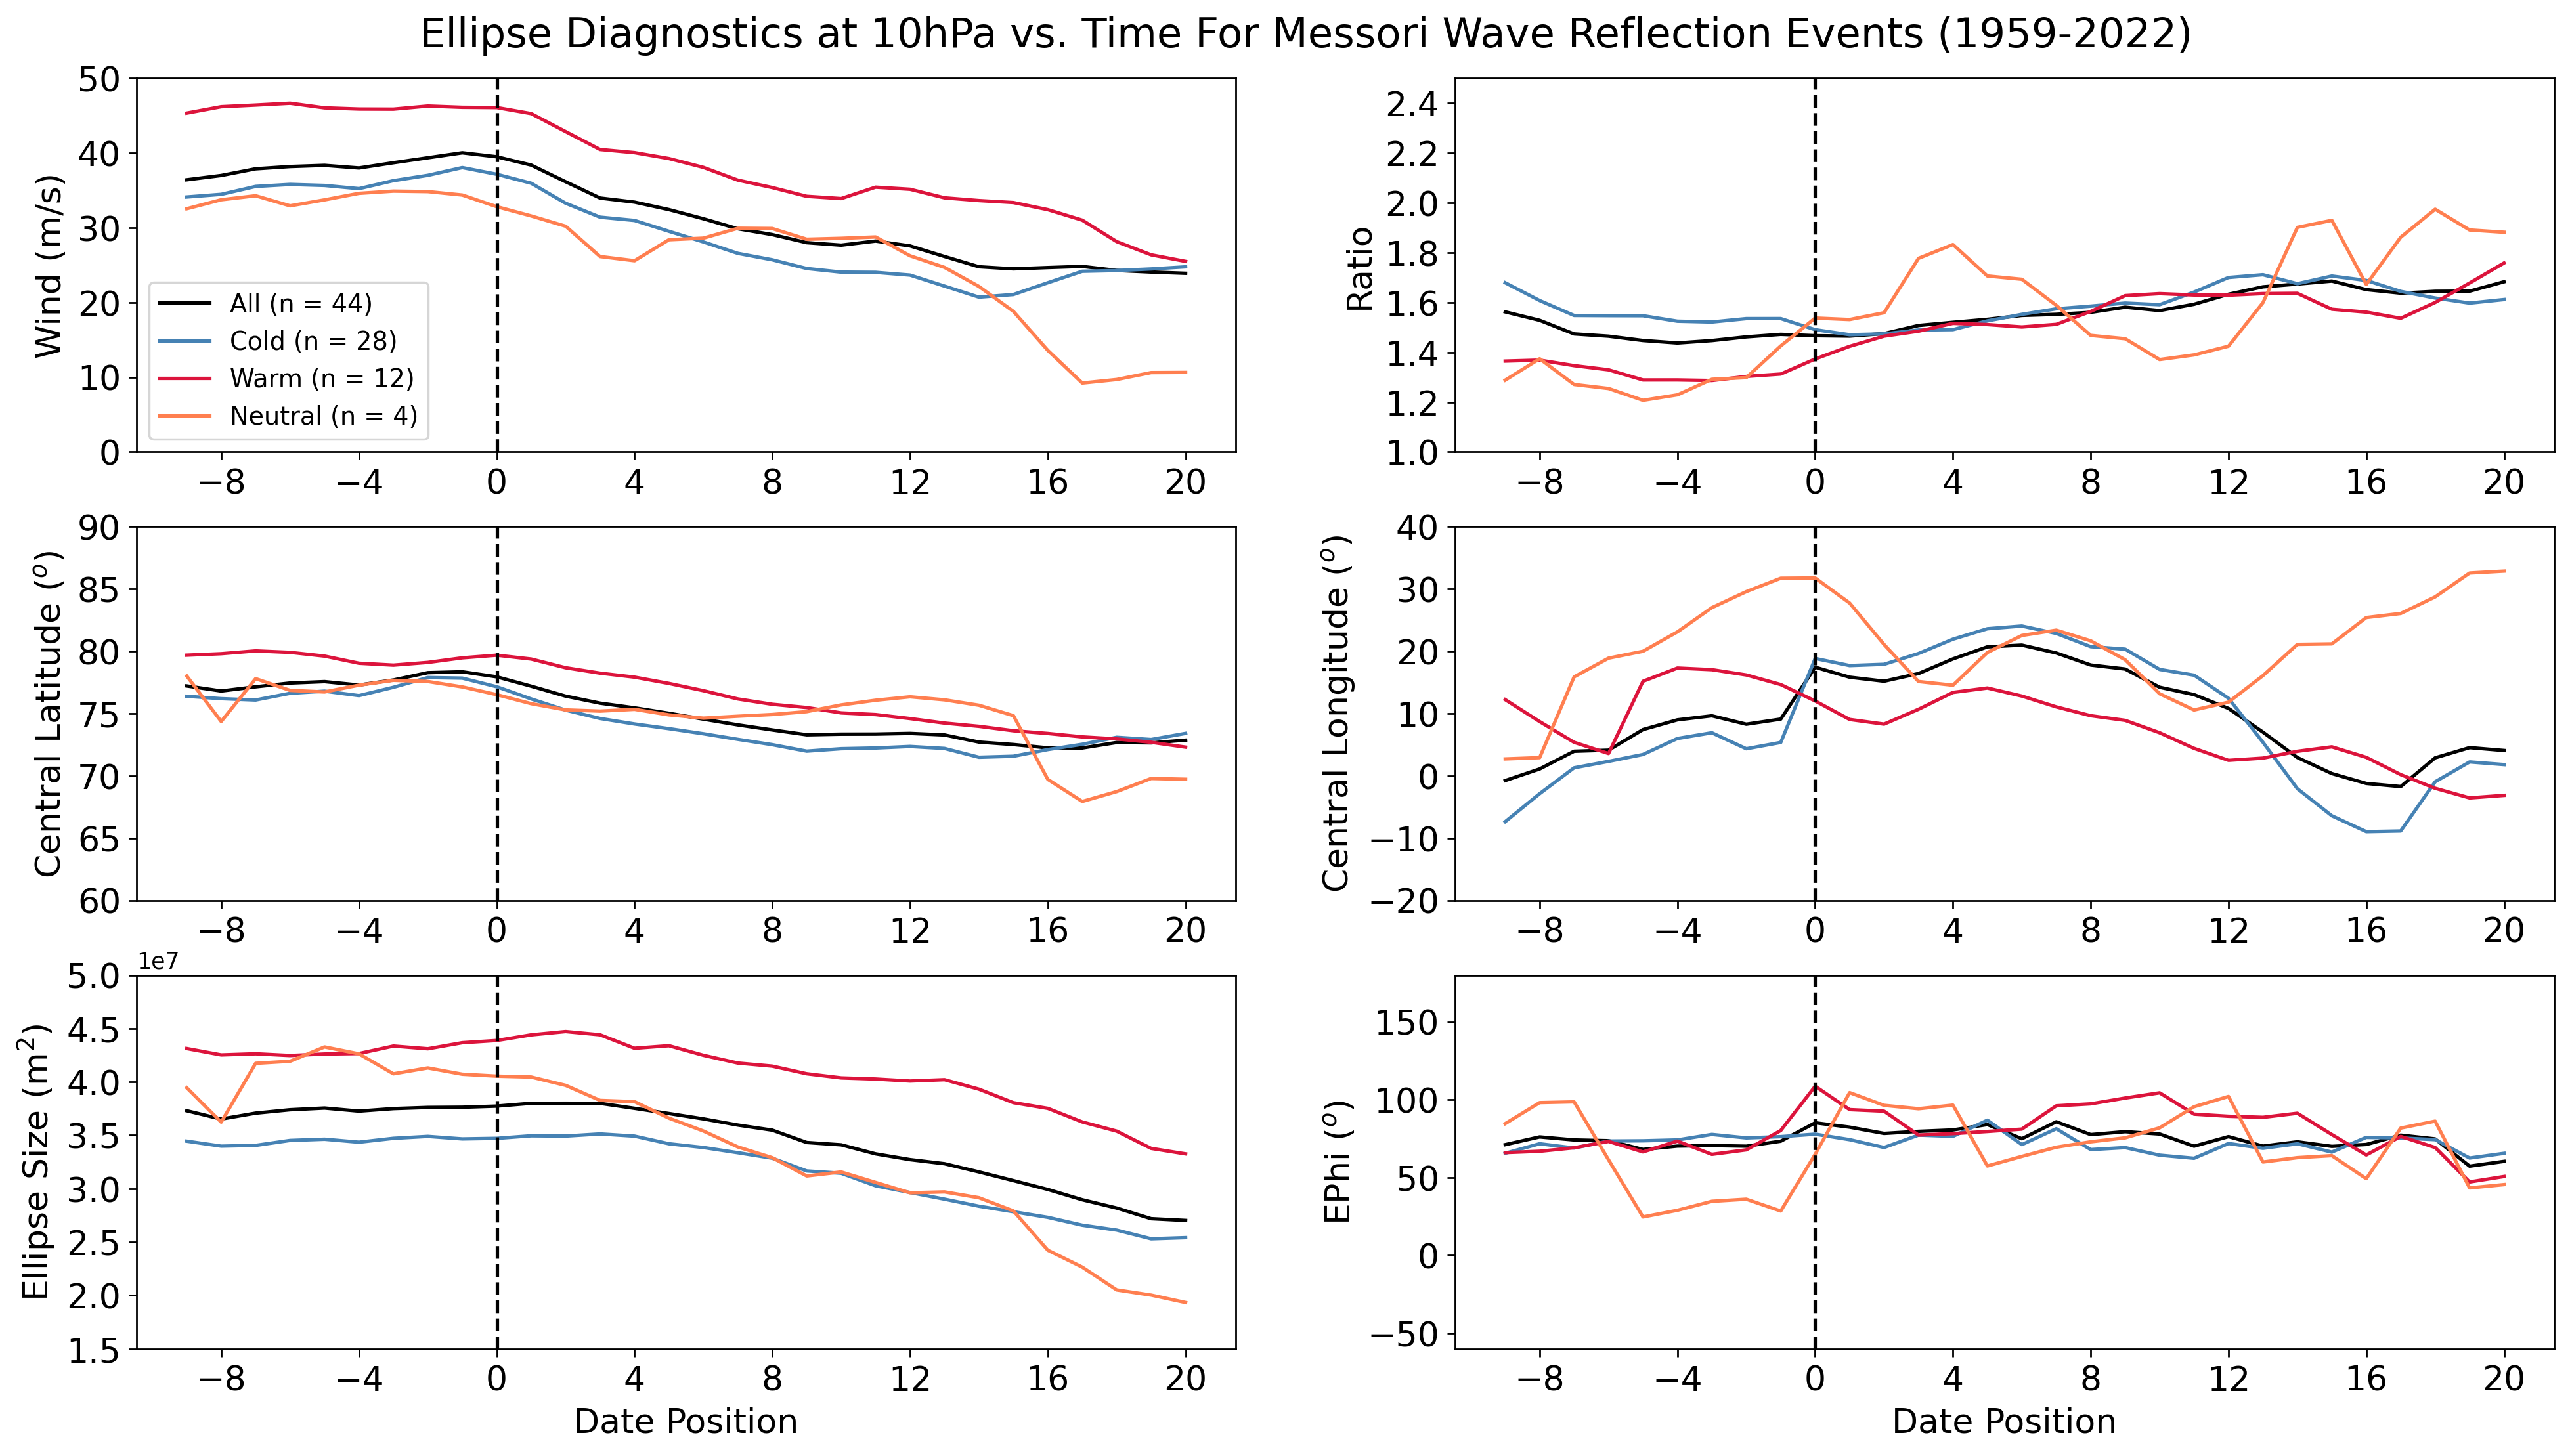

In [23]:
myLocator = mticker.MultipleLocator(4)
l2 = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

fs = 15

fig = plt.figure(figsize=(19,9.5),dpi=250)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time For Messori Wave Reflection Events (1959-2022)", fontsize = 18)
plt.tight_layout()    
ax1 = plt.subplot(3,2,1)
ax1.plot(l2, sswwind, label = "All (n = 44)", color='k')
ax1.plot(l2, sswwind1, label = "Cold (n = 28)", color='steelblue')
ax1.plot(l2, sswwind3, label = "Warm (n = 12)", color='crimson')
ax1.plot(l2, sswwind2, label = "Neutral (n = 4)", color='coral')
#ax1.axhline(y=0, color='k', linestyle=':', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = fs)
ax1.set_ylim(0,50)
#ax1.set_xlabel("Date Position", fontsize = fs)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--')
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = 11)

ax2 = plt.subplot(3,2,2)
ax2.plot(l2, sswrat, label = "All Ratio", color='k')
ax2.plot(l2, sswrat1, label = "Cold Ratio", color='steelblue')
ax2.plot(l2, sswrat3, label = "Warm Ratio", color='crimson')
ax2.plot(l2, sswrat2, label = "Neutral Ratio", color='coral')
ax2.set_ylabel("Ratio", fontsize = fs)
ax2.set_ylim(1,2.5)
#ax2.set_xlabel("Date Position", fontsize = fs)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--')
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
#plt.legend(fontsize = 10)
    
ax3 = plt.subplot(3,2,3)
ax3.plot(l2, sswcenlt, label = "All Central Latitude ($^o$)", color='k')
ax3.plot(l2, sswcenlt1, label = "Cold Central Latitude ($^o$)", color='steelblue')
ax3.plot(l2, sswcenlt3, label = "Warm Central Latitude ($^o$)", color='crimson')
ax3.plot(l2, sswcenlt2, label = "Neutral Central Latitude ($^o$)", color='coral')
#ax3.plot(l2, sswcenlt2, label = "E2 Central Latitude ($^o$)", color = "darkgreen")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = fs)
#ax3.set_xlabel("Date Position", fontsize = fs)
ax3.set_ylim(60,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--')
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
#plt.legend(fontsize = 10)

ax4 = plt.subplot(3,2,4)
ax4.plot(l2, sswcenln, label = "All Central Longitude ($^o$)", color='k')
ax4.plot(l2, sswcenln1, label = "Cold Central Longitude ($^o$)", color='steelblue')
ax4.plot(l2, sswcenln3, label = "Warm Central Longitude ($^o$)", color='crimson')
ax4.plot(l2, sswcenln2, label = "Neutral Central Longitude ($^o$)", color='coral')
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = fs)
#ax4.set_xlabel("Date Position", fontsize = fs)
ax4.set_ylim(-20,40)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--')
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
#plt.legend(fontsize = 10)

ax5 = plt.subplot(3,2,5)
ax5.plot(l2, sswsize, label = "All Ellipse Size (m)", color='k')
ax5.plot(l2, sswsize1, label = "Cold Ellipse Size (m)", color='steelblue')
ax5.plot(l2, sswsize3, label = "Warm Ellipse Size (m)", color='crimson')
ax5.plot(l2, sswsize2, label = "Neutral Ellipse Size (m)", color='coral')
#ax5.plot(l2, sswsize2, label = "E2 Ellipse Size (m)", color = "chocolate")
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = fs)
ax5.set_ylim(15000000,50000000)
ax5.set_xlabel("Date Position", fontsize = fs)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--')
#plt.legend(fontsize = 10)

ax6 = plt.subplot(3,2,6)
ax6.plot(l2, sswep, label = "All EPhi ($^o$)", color='k')
ax6.plot(l2, sswep1, label = "Cold EPhi ($^o$)", color='steelblue')
ax6.plot(l2, sswep3, label = "Warm EPhi ($^o$)", color='crimson')
ax6.plot(l2, sswep2, label = "Neutral EPhi ($^o$)", color='coral')
#ax6.plot(l2, sswep2, label = "E2 EPhi", color = "darkred")
ax6.set_ylabel("EPhi ($^o$)", fontsize = fs)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = fs)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--')
#plt.legend(fontsize = 10)
'''
ax7 = plt.subplot(4,2,7)
ax7.plot(l2, sswnum, label = "All Number", color='k')
ax7.plot(l2, sswnum1, label = "Cold Number", color='steelblue')
ax7.plot(l2, sswnum3, label = "Warm Number", color='crimson')
ax7.plot(l2, sswnum2, label = "Neutral Number", color='coral')
ax7.set_ylabel("Number of Ellipses", fontsize = fs)
ax7.set_xlabel("Date Position", fontsize = fs)
ax7.set_ylim(0,2)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--')
#plt.legend(fontsize = 10)

ax8 = plt.subplot(4,2,8)
ax8.plot(l2, sswg, label = "All GPH", color='k')
ax8.plot(l2, sswg1, label = "Cold GPH", color='steelblue')
ax8.plot(l2, sswg3, label = "Warm GPH", color='crimson')
ax8.plot(l2, sswg2, label = "Neutral GPH", color='coral')
ax8.set_ylabel("GPH Anom at 1000hPa", fontsize = fs)
ax8.set_xlabel("Date Position", fontsize = fs)
#ax8.set_ylim(-10,30)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=0,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--')
#plt.legend(fontsize = 10)
'''
    
plt.xticks(rotation=0,fontsize = fs)
plt.subplots_adjust(top=0.94)    
plt.savefig("10Mes_Timeline_reduce.png")